In [2]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data_year = data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 
                                    'Global_Positioning', 'Pairwise_alignment', 'Pairwise_alignment (DP-based?)',
                                    'fix length seed', 'Variable length seed (hybrid seeding)', 'spaced seed',
                                    'chain_of_seeds']]
data_year.loc[data_year.loc[:,'Indexing'] == 'Hashing', 'Index'] = 'Hashing'
data_year.loc[data_year.loc[:,'Indexing'] == 'BWT-FM', 'Index'] = 'BWT-FM'
data_year.loc[data_year.loc[:,'Indexing'] == 'Suffix Array', 'Index'] = 'Other Suffix'
data_year.loc[data_year.loc[:,'Indexing'] == 'BWT-ST', 'Index'] = 'Other Suffix'
data_year.loc[data_year.loc[:,'Indexing'] == 'Suffix Tree', 'Index'] = 'Other Suffix'

data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'SW', 'Pairwise'] = 'Smith-Waterman'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'HD', 'Pairwise'] = 'Hamming Distance'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'NW', 'Pairwise'] = 'Needleman-Wunsch'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Non-DP Heuristic', 'Pairwise'] = 'Non-DP Heuristic'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'SW & NW', 'Pairwise'] = 'Multiple Methods'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'SW & Semi-Global', 'Pairwise'] = 'Multiple Methods'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Rabin-Karp Algorithm', 'Pairwise'] = 'Other DP'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Landau-Vishkin', 'Pairwise'] = 'Other DP'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Sparse DP', 'Pairwise'] = 'Other DP'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Banded Myers Bit Vector', 'Pairwise'] = 'Other DP'
data_year.loc[data_year.loc[:,'Pairwise_alignment'] == 'Semi-Global', 'Pairwise'] = 'Other DP'

data_year.loc[data_year.loc[:,'Pairwise_alignment (DP-based?)'] == 'Y', 'Dynamic Programming'] = 'Yes'
data_year.loc[data_year.loc[:,'Pairwise_alignment (DP-based?)'] == 'N', 'Dynamic Programming'] = 'No'

data_year.loc[data_year.loc[:,'fix length seed'] == 'Y', 'Fixed Length Seed'] = 'Yes'
data_year.loc[data_year.loc[:,'fix length seed'] == 'N', 'Fixed Length Seed'] = 'No'

data_year.loc[data_year.loc[:,'Variable length seed (hybrid seeding)'] == 'Y', 'Variable Length Seed'] = 'Yes'
data_year.loc[data_year.loc[:,'Variable length seed (hybrid seeding)'] == 'N', 'Variable Length Seed'] = 'No'

data_year.loc[data_year.loc[:,'chain_of_seeds'] == 'Y', 'Chain of Seeds'] = 'Yes'
data_year.loc[data_year.loc[:,'chain_of_seeds'] == 'N', 'Chain of Seeds'] = 'No'

data_year.loc[data_year.loc[:,'spaced seed'] == 'Y', 'Spaced Seed'] = 'Yes'
data_year.loc[data_year.loc[:,'spaced seed'] == 'N', 'Spaced Seed'] = 'No'

data_year.head()

,Year_of_publication,Aligner,Application,Indexing,Global_Positioning,Pairwise_alignment,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Index,Pairwise,Dynamic Programming,Fixed Length Seed,Variable Length Seed,Chain of Seeds,Spaced Seed
0,2011,Bismark,BS-Seq,BWT-FM,Backward Search,HD,N,Y,N,N,N,BWT-FM,Hamming Distance,No,Yes,No,No,No
1,2009,BRAT,BS-Seq,Hashing,Seed,HD,N,Y,N,N,N,Hashing,Hamming Distance,No,Yes,No,No,No
2,2012,BRAT-BW,BS-Seq,BWT-FM,Backward Search,HD,N,N,Y,N,N,BWT-FM,Hamming Distance,No,No,Yes,No,No
3,2010,BS-Seeker,BS-Seq,BWT-FM,Backward Search,HD,N,Y,N,N,N,BWT-FM,Hamming Distance,No,Yes,No,No,No
4,2013,BS-Seeker2,BS-Seq,BWT-FM,Backward Search,SW & NW,Y,Y,N,N,N,BWT-FM,Multiple Methods,Yes,Yes,No,No,No


In [3]:
from matplotlib import cm

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

clrs[2::-1]

['limegreen', 'darkorange', 'cornflowerblue']

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set_style('white')
sns.set_context('talk')

plt.figure(figsize=(11,4))
idx_group = data_year.groupby('Index').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(idx_group.Aligner, colors=clrs[2::-1])
pct = 100.*idx_group.Aligner/idx_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(idx_group.index, idx_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(.9, .5))
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Indexing_Pie.png')
plt.savefig('../figures/Indexing_Pie.pdf')

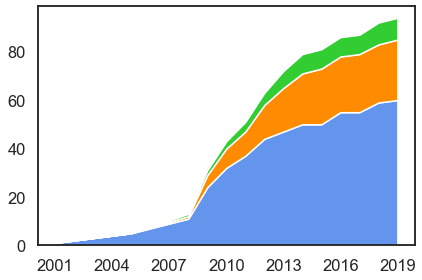

In [5]:
by_year = data_year.groupby(['Year_of_publication','Index']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index
by_year

plt.stackplot(x, by_year.loc[:,'Hashing'], by_year.loc[:,'BWT-FM'], by_year.loc[:,'Other Suffix'], 
              labels=['Hashing','BWT-FM','Other Suffix'], colors=clrs)
#plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 3))
#plt.show()

plt.tight_layout()
plt.savefig('../figures/Indexing_over_Time.png')
plt.savefig('../figures/Indexing_over_Time.pdf')

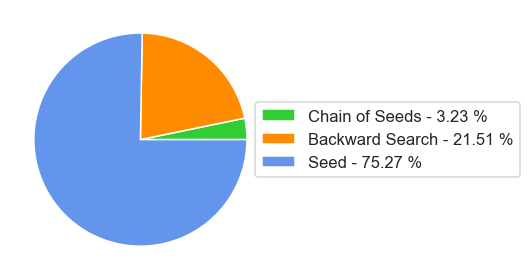

In [6]:
plt.figure(figsize=(11,4))

global_group = data_year.groupby('Global_Positioning').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(global_group.Aligner, colors=clrs[2::-1])
pct = 100.*global_group.Aligner/global_group.Aligner.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(global_group.index, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(.9, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Global_Pie.png')
plt.savefig('../figures/Global_Pie.pdf')

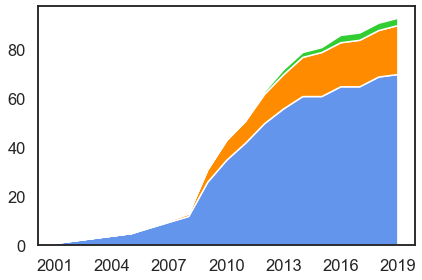

In [7]:
by_year = data_year.groupby(['Year_of_publication','Global_Positioning']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Seed'], by_year.loc[:,'Backward Search'], by_year.loc[:,'Chain of Seeds'], 
              labels=['Seed', 'Backward Search', 'Chain of Seeds'], colors=clrs)
#plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Global_over_Time.png')
plt.savefig('../figures/Global_over_Time.pdf')

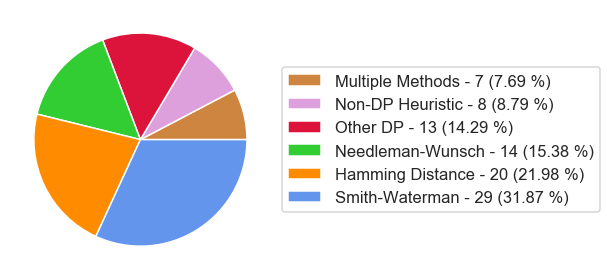

In [8]:
plt.figure(figsize=(12,4))

pairwise_group = data_year.groupby('Pairwise').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(pairwise_group.Aligner, colors=clrs[5::-1])
pct = 100.*pairwise_group.Aligner/pairwise_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(pairwise_group.index, pairwise_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Local_Pie.png')
plt.savefig('../figures/Local_Pie.pdf')

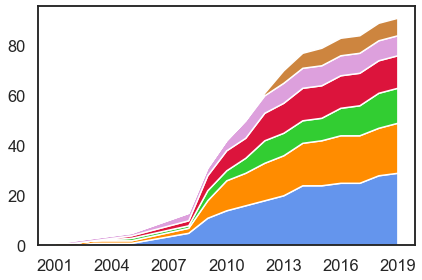

In [9]:
by_year = data_year.groupby(['Year_of_publication','Pairwise']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Smith-Waterman'], by_year.loc[:,'Hamming Distance'], 
              by_year.loc[:,'Needleman-Wunsch'], by_year.loc[:,'Other DP'], 
              by_year.loc[:,'Non-DP Heuristic'], by_year.loc[:,'Multiple Methods'],
              labels=['Smith-Waterman', 'Hamming Distance', 'Needleman-Wunsch', 'Other DP',
                      'Non-DP Heuristic', 'Multiple Methods'], colors=clrs)
#plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Local_over_Time.png')
plt.savefig('../figures/Local_over_Time.pdf')

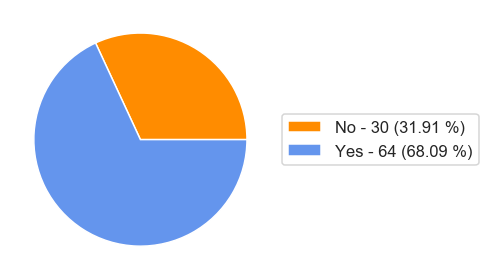

In [10]:
plt.figure(figsize=(12,4))

DP_group = data_year.groupby('Dynamic Programming').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(DP_group.Aligner, colors=clrs[1::-1])
pct = 100.*DP_group.Aligner/DP_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(DP_group.index, DP_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/DP_Pie.png')
plt.savefig('../figures/DP_Pie.pdf')

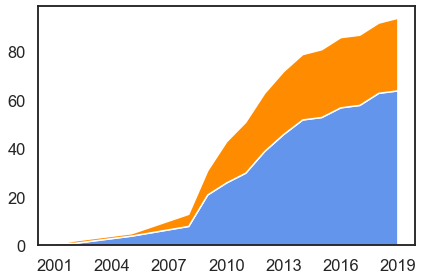

In [11]:
by_year = data_year.groupby(['Year_of_publication','Dynamic Programming']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=clrs)

plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/DP_over_Time.png')
plt.savefig('../figures/DP_over_Time.pdf')

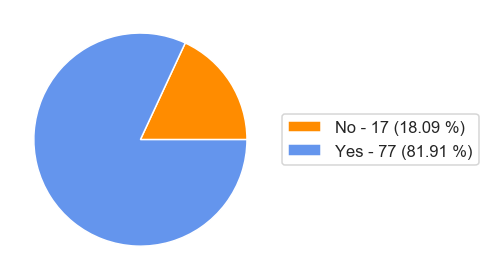

In [12]:
plt.figure(figsize=(12,4))

FLS_group = data_year.groupby('Fixed Length Seed').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(FLS_group.Aligner, colors=clrs[1::-1])
pct = 100.*FLS_group.Aligner/FLS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(FLS_group.index, FLS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/FLS_Pie.png')
plt.savefig('../figures/FLS_Pie.pdf')

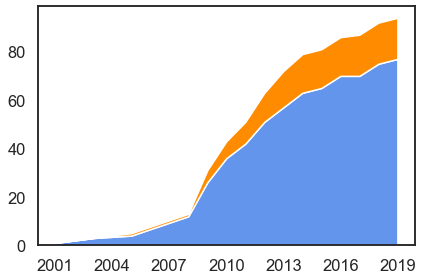

In [13]:
by_year = data_year.groupby(['Year_of_publication','Fixed Length Seed']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=clrs)

plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/FLS_over_Time.png')
plt.savefig('../figures/FLS_over_Time.pdf')

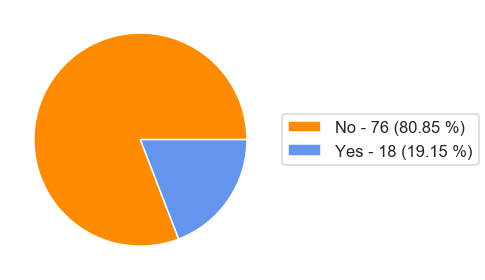

In [14]:
plt.figure(figsize=(12,4))

VLS_group = data_year.groupby('Variable Length Seed').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(VLS_group.Aligner, colors=clrs[1::-1])
pct = 100.*VLS_group.Aligner/VLS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(VLS_group.index, VLS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/VLS_Pie.png')
plt.savefig('../figures/VLS_Pie.pdf')

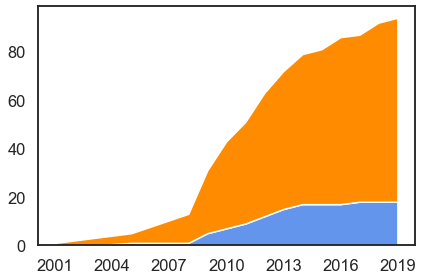

In [15]:
by_year = data_year.groupby(['Year_of_publication','Variable Length Seed']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=clrs)

plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/VLS_over_Time.png')
plt.savefig('../figures/VLS_over_Time.pdf')

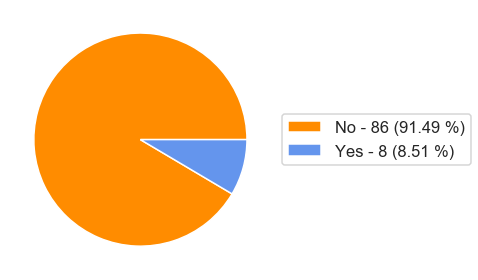

In [16]:
plt.figure(figsize=(12,4))

SS_group = data_year.groupby('Spaced Seed').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(SS_group.Aligner, colors=clrs[1::-1])
pct = 100.*SS_group.Aligner/SS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(SS_group.index, SS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/SS_Pie.png')
plt.savefig('../figures/SS_Pie.pdf')

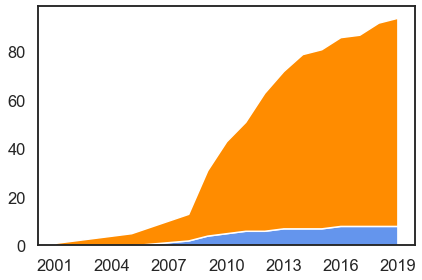

In [17]:
by_year = data_year.groupby(['Year_of_publication','Spaced Seed']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=clrs)

plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/SS_over_Time.png')
plt.savefig('../figures/SS_over_Time.pdf')

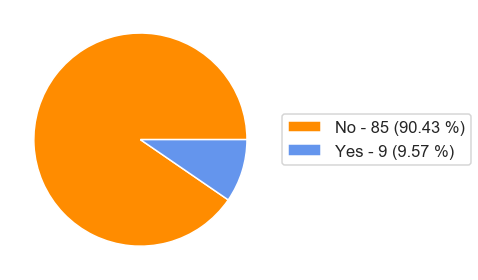

In [18]:
plt.figure(figsize=(12,4))

CoS_group = data_year.groupby('Chain of Seeds').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(CoS_group.Aligner, colors=clrs[1::-1])
pct = 100.*CoS_group.Aligner/CoS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(CoS_group.index, CoS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/CoS_Pie.png')
plt.savefig('../figures/CoS_Pie.pdf')

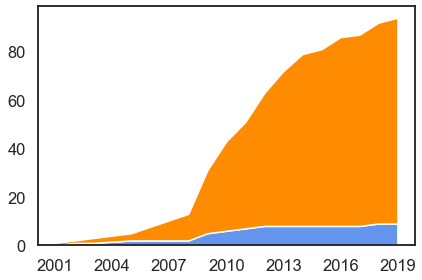

In [19]:
by_year = data_year.groupby(['Year_of_publication','Chain of Seeds']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=clrs)

plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/CoS_over_Time.png')
plt.savefig('../figures/CoS_over_Time.pdf')